<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Máquinas de aprendizaje aplicadas a la medicina
---
En primera instancia, se cargan los datos a trabajar en un *dataframe* de pandas, expresando las variables categóricas en su estructura original.

In [114]:
import pandas as pd
import numpy as np

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')

df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'
df.loc[df['chest_pain'] == 1, 'chest_pain'] = 'typical angina'
df.loc[df['chest_pain'] == 2, 'chest_pain'] = 'atypical angina'
df.loc[df['chest_pain'] == 3, 'chest_pain'] = 'non-anginal pain'
df.loc[df['chest_pain'] == 4, 'chest_pain'] = 'asymptomatic'
df.loc[df['blood_s'] == 0, 'blood_s'] = 'lower than 120mg/ml'
df.loc[df['blood_s'] == 1, 'blood_s'] = 'greater than 120mg/ml'
df.loc[df['electro'] == 0, 'electro'] = 'normal'
df.loc[df['electro'] == 1, 'electro'] = 'ST-T wave abnormality'
df.loc[df['electro'] == 2, 'electro'] = 'left ventricular hypertrophy'
df.loc[df['angina'] == 0, 'angina'] = 'no'
df.loc[df['angina'] == 1, 'angina'] = 'yes'
df.loc[df['slope'] == 1, 'slope'] = 'upsloping'
df.loc[df['slope'] == 2, 'slope'] = 'flat'
df.loc[df['slope'] == 3, 'slope'] = 'downsloping'
df.loc[df['thal'] == 3, 'thal'] = 'normal'
df.loc[df['thal'] == 6, 'thal'] = 'fixed defect'
df.loc[df['thal'] == 7, 'thal'] = 'reversable defect'

df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

**Respuesta:**

Para comenzar, se genera un resumen de los valores obtenidos para la media, desviación estándar y cuartiles del potencial boxplot que se generaría para cada atributo no categórico del dataset (hasta *vessel*), tanto para pacientes sanos como enfermos:


In [115]:
sanos = df[df.normal == 1].drop(['normal'], axis=1)
enfermos = df[df.normal == 2].drop(['normal'], axis=1)

print("Pacientes sanos:\n", sanos.describe(), "\n")
print("Pacientes enfermos:\n", enfermos.describe())

Pacientes sanos:
               age     blood_p       serum   max_heart     oldpeak      vessel
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000
mean    52.706667  128.866667  244.213333  158.333333    0.622667    0.286667
std      9.509830   16.457660   54.019085   19.283357    0.800851    0.648557
min     29.000000   94.000000  126.000000   96.000000    0.000000    0.000000
25%     45.000000  120.000000  209.000000  148.250000    0.000000    0.000000
50%     52.000000  130.000000  236.000000  161.000000    0.200000    0.000000
75%     59.000000  140.000000  268.750000  172.000000    1.175000    0.000000
max     76.000000  180.000000  564.000000  202.000000    4.200000    3.000000 

Pacientes enfermos:
               age     blood_p       serum   max_heart     oldpeak      vessel
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000
mean    56.591667  134.441667  256.466667  138.858333    1.584167    1.150000
std      8.116273   19.

A primera vista, al comparar entre pacientes sanos y enfermos, se puede observar que las variables de *frecuencia cardíaca máxima*, *oldpeak* y *vessel* son más inestables entre una clase y la otra. Sin embargo, si se analizan en mayor profundidad los potenciales boxplots, se puede hallar otras diferencias notables.

El primer análisis gráfico que puede efectuarse, a partir de los datos obtenidos anteriormente, es el de la edad tanto de los pacientes sanos como de los enfermos. Para esto se observan los boxplots a continuación:

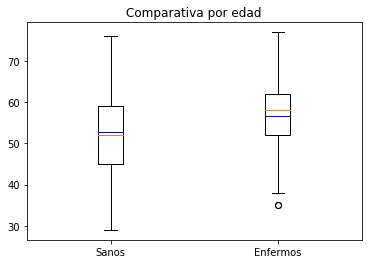

In [116]:
import numpy as np
import matplotlib.pyplot as plt

age_healthy = df['age'][df['normal'] == 1]
age_ill = df['age'][df['normal'] == 2]

data = [age_healthy, age_ill]
fig, ax = plt.subplots()
ax.set_title('Comparativa por edad')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.xticks([1, 2], ['Sanos', 'Enfermos'])
plt.show()

Es fácil notar que el 75% de la población de pacientes enfermos es más vieja que la mitad de la población de pacientes sanos, por lo que el atributo *age* podría considerarse como relevante para la construcción de un modelo futuro.
Luego, puede analizarse la presión sanguínea:

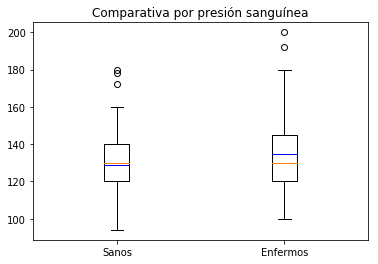

In [117]:
blood_p_healthy = df['blood_p'][df['normal'] == 1]
blood_p_ill = df['blood_p'][df['normal'] == 2]

data = [blood_p_healthy, blood_p_ill]
fig, ax = plt.subplots()
ax.set_title('Comparativa por presión sanguínea')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.xticks([1, 2], ['Sanos', 'Enfermos'])
plt.show()

En este caso, no hay mucho que decir, puesto que los boxplots se sobreponen; por lo mismo, es posible descartar la variable de presión sanguínea como atributo relevante para la construcción de un modelo futuro. Tras esto, puede analizarse el colesterol sérico:

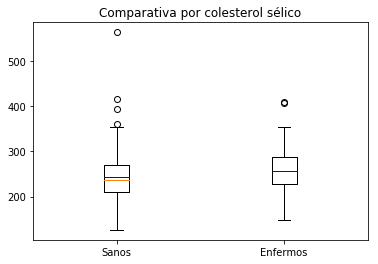

In [118]:
serum_healthy = df['serum'][df['normal'] == 1]
serum_ill = df['serum'][df['normal'] == 2]

data = [serum_healthy, serum_ill]
fig, ax = plt.subplots()
ax.set_title('Comparativa por colesterol sélico')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.xticks([1, 2], ['Sanos', 'Enfermos'])
plt.show()

Nuevamente, no es mucho lo que se puede rescatar el gráfico, ya que ambos boxplots se sobreponen. Al igual que en el caso de la presión sanguínea, el colesterol sérico puede descartarse para un futuro modelo predictivo. Tras este análisis, se puede proceder con el análisis del ritmo cardíaco máximo:

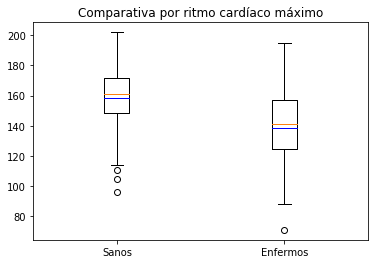

In [119]:
max_heart_healthy = df['max_heart'][df['normal'] == 1]
max_heart_ill = df['max_heart'][df['normal'] == 2]

data = [max_heart_healthy, max_heart_ill]
fig, ax = plt.subplots()
ax.set_title('Comparativa por ritmo cardíaco máximo')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.xticks([1, 2], ['Sanos', 'Enfermos'])
plt.show()

En este caso sí es posible observar mayores diferencias, ya que casi $3/4$ de la muestra de pacientes enfermos es comparable a $1/4$ de la población sana. Es decir, la población enferma es más propensa a padecer un ritmo cardíaco máximo bajo que la población sana.

El análisis anterior permite dar cuenta de que las variables numéricas reales más relevantes para la construcción de un modelo de predicción vendrían siendo la *edad*, el *ritmo cardíaco máximo*, *oldpeak* y *vessel*.

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**

**Respuesta:**

En primera instancia, los algoritmos de ML utilizados para el desarrollo de esta tarea requieren de inputs y outputs de tipo numérico, por lo que la representación categórica *(aplicada en el punto anterior)* de las variables no es una opción.

Como se puede ver en el archivo *heart.dat*, las variables categóricas del dataset están representadas mediante valores enteros, lo cual podría causar cierta inestabilidad en los resultados del entrenamiento. Por ejemplo, si se entrenara el modelo sobre la variable *chest_pain* con las representaciones originales, se podría obtener diferentes resultados para la **función de pérdida** cuando dos predicciones incorrectas apuntan al mismo valor esperado, asumiendo cierto grado de jerarquía y/o cercanía entre los valores que puede tomar la variable, lo cual puede no ser estrictamente cierto. Así, bajo la representación de *one hot vectors*, el clasificador puede re-dimensionar el espacio de variables, transformando a las variables categóricas como *"la presencia o no de cada valor posible"*.

In [120]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


### Predecir la presión sanguínea

En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.

**Respuesta:**

En el caso de la variable asociada a la enfermedad cardíaca, cuyos valores son $1$ ó $2$, tras extraerla, se resta una unidad a cada dato registrado, de manera tal que se pueda evaluar su comportamiento como si fuese una variable binaria:

In [121]:
data = df.copy()

class_label = data.pop("normal").values -1
reg_label = data.pop("blood_p").values
X_data = data.values

data.head()

,age,serum,max_heart,oldpeak,vessel,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical angina,chest_pain_non-anginal pain,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,322.0,109.0,2.4,3.0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,67.0,564.0,160.0,1.6,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
2,57.0,261.0,141.0,0.3,0.0,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,263.0,105.0,0.2,1.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
4,74.0,269.0,121.0,0.2,1.0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0


> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

**Respuesta:**

Tal como se señala, se crea un conjunto de entrenamiento y otro de pruebas que permitan construir y probar el modelo de regresión lineal solicitado.

In [122]:
np.random.seed(11102019)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

X_train = X_data[~mask_test] 
X_test = X_data[mask_test]

# Datos de presión sanguínea.
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]

# Clasificaciones enfermo/no enfermo.
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]

print("Train: ", X_train.shape)
print("Test: ", X_test.shape)

Train:  (183, 24)
Test:  (87, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**.

**Respuesta:**

La normalización de los datos permite liberar a las distintas variables de sus respectivas escalas, transformándolas en variables adimensionales y "centrándolas" de modo que todas posean los mismos parámetros que una distribución normal estándar: $X_i \sim \mathcal{N}(\mu=0, \sigma=1)$. Gracias a este paso, se hace mucho más fácil y estable, para un modelo de regresión lineal, el entrenamiento de los coeficientes/pesos de cada atributo. 

In [123]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

**Respuesta:**

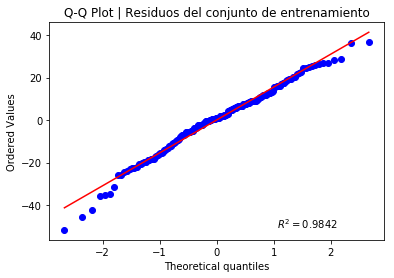

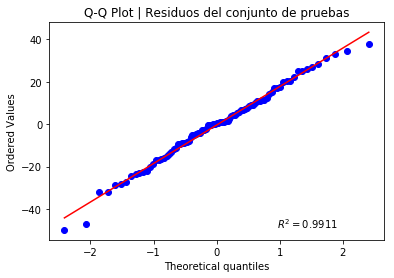

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats

# Se construye el modelo a base del set de entrenamiento
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)

# Se generan las predicciones sobre el set de entrenamiento y el de pruebas
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

# Se calculan los errores de predicción
error_train = reg_pred_train - reg_label_train
error_test = reg_pred_test - reg_label_test

# Q-Q plots
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
stats.probplot(error_train, dist="norm", plot=ax1, rvalue=True)
ax1.set_title("Q-Q Plot | Residuos del conjunto de entrenamiento")

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
stats.probplot(error_test, dist="norm", plot=ax2, rvalue=True)
ax2.set_title("Q-Q Plot | Residuos del conjunto de pruebas")

plt.show()

Tras entrenar el modelo de regresión lineal de mínimos cuadrados, se grafican los Q-Q plots tanto para el set de entrenamiento como para el de pruebas. En ambos se observa que la distribución de los residuos se acerca, con coeficientes de determinación $R^2 = 0.9842$ y $R^2 = 0.9911$ respectivamente, a una distribución normal. De esta manera, es razonable asumir que la hipótesis de normalidad sobre los errores de predicción es cierta.

Es más, si se aplicara una limpieza sobre el dataset, de manera que los outliers no fueran considerados, la distribución de los residuos se asemejaría con mayor precisión a una distribución normal.

> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

**Respuesta:**

Para obtener los pesos, simplemente se invoca la llamada a la función *coef_* del modelo de regresión lineal. Para el caso del *Z-score*, se procede a calcular el Z-score de cada atributo, para cada dato, generando un promedio por atributo.

In [125]:
from sklearn.metrics import f1_score

# Se crea un dataframe para tabular lo solicitado
table = pd.DataFrame(columns=['Weights', 'Z-score'])

# Array de pesos
weights = model.coef_

# Array de Z-score
z_score_mean = []
columns = list(data.columns)

for i in columns:
    z_score = stats.zscore(data[i])
    z_score_mean.append(np.mean(z_score))

# Array de F-score
formatted_reg_label_test = [ '%.2f' % elem for elem in reg_label_test ]
formatted_reg_pred_test = [ '%.2f' % elem for elem in reg_pred_test ]

# Incorporación de arrays a la tabla
table['Weights'] = weights
table['Z-score'] = z_score_mean

table

,Weights,Z-score
0,4.989544,3.667848e-16
1,1.203507,-2.467162e-16
2,3.139046,2.631640e-17
3,1.761447,-5.263280e-17
4,-0.155050,-6.579099e-17
5,0.444616,-6.579099e-18
6,-0.444616,6.579099e-18
7,-1.976661,0.000000e+00
8,1.134892,-1.973730e-17
9,-0.039457,1.578984e-16


> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

**Respuesta:**



In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE train: ", "%.4f" % mean_absolute_error(reg_label_train, reg_pred_train))
print("MAE test: ", "%.4f" % mean_absolute_error(reg_label_test, reg_pred_test))

MAE train:  11.8305
MAE test:  13.8834


El error absoluto medio sirve para cuantificar la precisión de una técnica de predicción; es el promedio de las diferencias absolutas entre la predicción y la observación real de las variables. En este caso, es posible observar que el error absoluto medio es de $11.83$ para el set de entrenamiento y de $13.88$ para el set de pruebas. Una diferencia de $\pm 12.85$ podría ser significativa, ya que, tal como se percibió en el boxplot de la parte a), la presión sanguínea se mueve entre los valores $94$ y $200$ (*considerando outliers*).

> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.

**Respuesta:**

In [42]:
from sklearn.model_selection import KFold

def cross_val(K):
    kf = KFold(n_splits=K)
    mse_cv = 0

    for train, val in kf.split(Xstd_train):
        linreg = LinearRegression(fit_intercept=True)
        linreg.fit(Xstd_train[train], reg_label_train[train])
        yhat_kfold_val = linreg.predict(Xstd_train[val])
        mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
        mse_cv += mse_fold
    return mse_cv/K

print("Para K=1: ", "%.4f" % cross_val(Xstd_train.shape[0]))
print("Para K=5: ", "%.4f" % cross_val(5), "\n")
print("MSE test: ", "%.4f" % mean_squared_error(reg_label_test, reg_pred_test))

Para K=1:  317.2107
Para K=5:  321.6744 

MSE test:  317.6894


Si bien la validación cruzada no es un método de aprendizaje, sí permite ajustar los parámetros del modelo, de manera que permite evaluar qué tan buena es la calidad de éste. Se puede observar que el error cuadrático medio *MSE* del modelo de regresión lineal sobre el conjunto de pruebas se asemeja bastante al valor medio obtenido para la validación cruzada con *leave-one-out*.

(QUÉ PODEMOS CONCLUIR ACÁ?)

> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa.

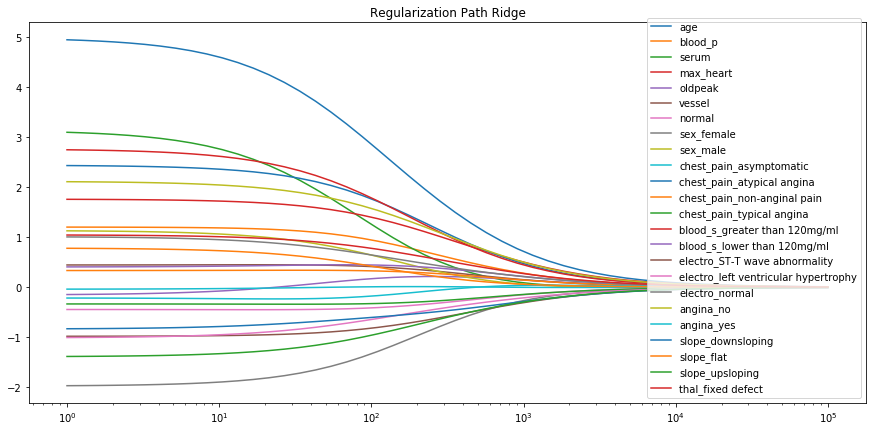

In [43]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Ridge')
plt.legend(loc='lower right')
plt.show()

> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

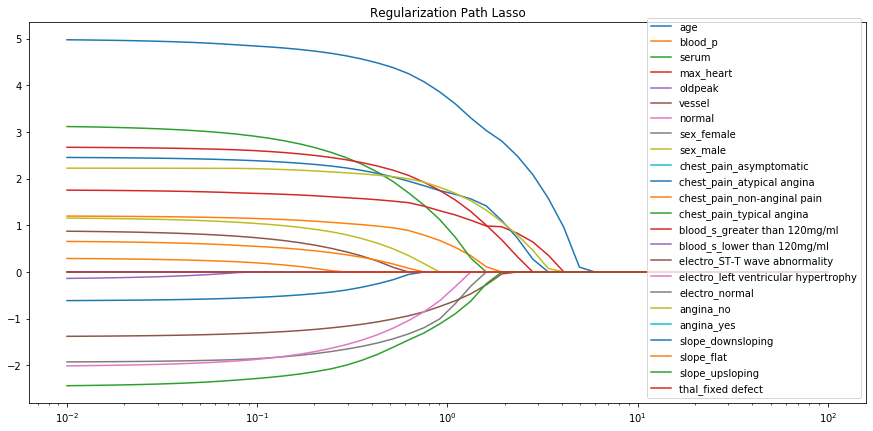

In [44]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

Se puede observar con "Lasso" ciertas variables decrecen rapidamente a cero, lo cual permite considerar las demas como atributos de forma mas confiable.


> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?

In [45]:
from ipywidgets import interactive
def train_model_lasso(param):
    model = Lasso(fit_intercept=True)
    A = 2**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train Lasso: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test Lasso: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
    
def train_model_ridge(param):
    model = Ridge(fit_intercept=True, solver='svd')
    A = 2**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train Ridge: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test Ridge: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -5 #define your range
p_max = 5 #define your range
interactive(train_model_lasso, param=(p_min,p_max))


interactive(children=(IntSlider(value=0, description='param', max=5, min=-5), Output()), _dom_classes=('widget…

In [46]:
interactive(train_model_ridge, param=(p_min,p_max))


interactive(children=(IntSlider(value=0, description='param', max=5, min=-5), Output()), _dom_classes=('widget…

Se observa que para "Ridge" la variacion del parametro no afecta demasiado en el MSE tanto de train como de test por lo que consideramos alpha=1 apropiado. Por otra parte para "Lasso" se observa una gran variación (negativa en los MSE) tanto para alpha mayores como menores a 1.

> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

selected = age ...
totalvars=2, mse = 284.472308
selected = chest_pain_atypical angina ...
totalvars=3, mse = 273.135717
selected = angina_no ...
totalvars=4, mse = 265.577682
selected = blood_s_greater than 120mg/ml ...
totalvars=5, mse = 258.025342
selected = serum ...
totalvars=6, mse = 252.087662
selected = max_heart ...
totalvars=7, mse = 249.539730
selected = sex_male ...
totalvars=8, mse = 247.154773
selected = blood_s_lower than 120mg/ml ...
totalvars=9, mse = 245.052618
selected = electro_left ventricular hypertrophy ...
totalvars=10, mse = 243.210034
selected = chest_pain_asymptomatic ...
totalvars=11, mse = 241.251406
selected = blood_p ...
totalvars=12, mse = 239.862889
selected = slope_flat ...
totalvars=13, mse = 238.342434
selected = vessel ...
totalvars=14, mse = 237.752964
selected = chest_pain_non-anginal pain ...
totalvars=15, mse = 237.367311
selected = angina_yes ...
totalvars=16, mse = 237.148315
selected = oldpeak ...
totalvars=17, mse = 237.130400
selected = nor

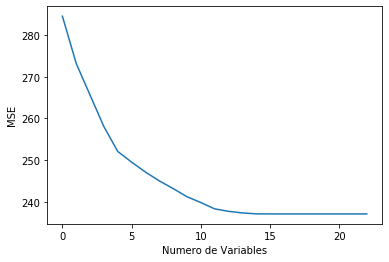

In [47]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    errors=[]

    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
        errors.append(best_new_score)
    plt.plot(errors)
    plt.ylabel('MSE')
    plt.xlabel('Numero de Variables')
    plt.show()
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]




Se puede observar que con 14 variables el valor de MSE empieza a variar de forma leve, por lo que con estas ya se puede tener un entrenamiento reducido en dimensionalidad identico al original.


> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

selected = blood_s_lower than 120mg/ml ...
totalvars=2, mse = 305.046657
selected = electro_normal ...
totalvars=3, mse = 305.248495
selected = chest_pain_asymptomatic ...
totalvars=4, mse = 293.364505
selected = age ...
totalvars=5, mse = 303.288641
selected = normal ...
totalvars=6, mse = 280.094089
selected = vessel ...
totalvars=7, mse = 280.094089
selected = electro_ST-T wave abnormality ...
totalvars=8, mse = 267.593090
selected = chest_pain_non-anginal pain ...
totalvars=9, mse = 270.982851
selected = sex_female ...
totalvars=10, mse = 272.357124
selected = chest_pain_typical angina ...
totalvars=11, mse = 254.473882
selected = electro_left ventricular hypertrophy ...
totalvars=12, mse = 259.439331
selected = slope_flat ...
totalvars=13, mse = 259.439331
selected = angina_no ...
totalvars=14, mse = 263.483025
selected = serum ...
totalvars=15, mse = 249.512781
selected = sex_male ...
totalvars=16, mse = 243.922476
selected = chest_pain_atypical angina ...
totalvars=17, mse = 241

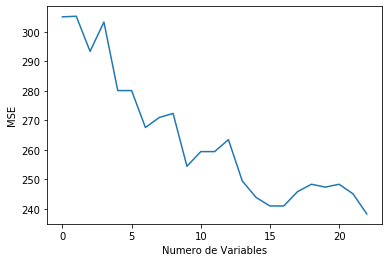

In [49]:
def fss2(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    errors=[]

    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        #Entrena una vez en el while
        score_candidates = []
        model = LinearRegression(fit_intercept=True, n_jobs=1)
        indexes = selected+[len(selected)] 
        x_train = x[:,indexes]
        predictions_train = model.fit(x_train, y).predict(x_train)
        res_train=[]
        for candidate in remaining:
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
            res_train.append((abs(residuals_train[candidate]), candidate))
        #Se selecciona atributo en cada iteración segun el que tenga mayor diferencia con el valor esperado.
        res_train.sort() 
        res_train[:] = res_train[::-1]
        resbest, best_candidate = res_train.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),error_candidate))
        errors.append(error_candidate)
    plt.plot(errors)
    plt.ylabel('MSE')
    plt.xlabel('Numero de Variables')
    plt.show()
    return selected
features_fss = fss2(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]


Como heurística se decidio considerar los atributos que mayor diferencia poseian en cada iteración de la predicción con su valor esperado.

Se puede observar que el MSE es irregular durante la selección de atributos, esto producto de que la heuristica posiblemente no fue la mas apropiada. Se logra observar que al igual que con la seleccion anterior, cercano a 14 atributos el valor de MSE deja de variar de forma notoria, pero hay muy poca información como para determinar si fue gracias a la heurística elegida o no.


> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?

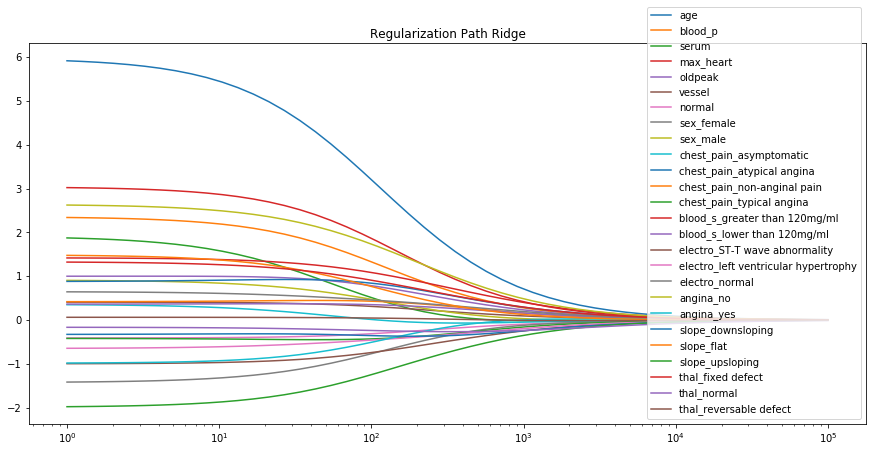

In [50]:
D = 50
F = np.random.normal(loc = 50, scale = 5, size=(Xstd_train.shape[0],D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)


alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Ridge')
plt.legend(loc='lower right')
plt.show()


Por como funciona "Ridge" no se logra observar con claridad el efecto de los atributos falsos, pero se puede destacar que estos no son eliminados ya que a lo más solo se reduce su importancia al momento de predecir.

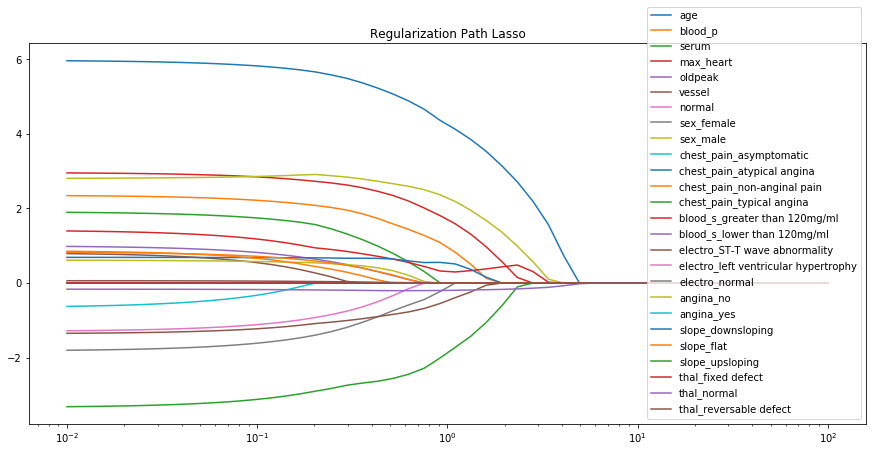

In [51]:


alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

Con "Lasso" se puede observar que varios atributos van a cero de forma rapida, pero no descarta necesariamente los atributos falsos añadidos, ya que estos igual pueden tener un efecto no deseado en la predicción lo cual los hace relevantes en el proceso de ajuste.

totalvars=2, mse = 288.196370
totalvars=3, mse = 276.591940
totalvars=4, mse = 268.320239
totalvars=5, mse = 261.686523
totalvars=6, mse = 255.069506
totalvars=7, mse = 249.366280
totalvars=8, mse = 243.486951
totalvars=9, mse = 237.097506
totalvars=10, mse = 231.988245
totalvars=11, mse = 227.235328
totalvars=12, mse = 222.839884
totalvars=13, mse = 218.681570
totalvars=14, mse = 214.686079
totalvars=15, mse = 211.046496
totalvars=16, mse = 208.192614
totalvars=17, mse = 205.601503
totalvars=18, mse = 202.696972
totalvars=19, mse = 200.181836
totalvars=20, mse = 197.353893
totalvars=21, mse = 195.353417
totalvars=22, mse = 193.664175
totalvars=23, mse = 192.130299
totalvars=24, mse = 190.437327
totalvars=25, mse = 189.205584
totalvars=26, mse = 188.020743
totalvars=27, mse = 186.712352
totalvars=28, mse = 185.911548
totalvars=29, mse = 185.092966
totalvars=30, mse = 184.362254
totalvars=31, mse = 183.574302
totalvars=32, mse = 182.709029
totalvars=33, mse = 181.987658
totalvars=34, ms

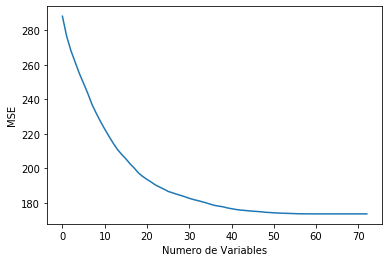

In [52]:
def fss_attFalsos(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    errors=[]

    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
        errors.append(best_new_score)
    plt.plot(errors)
    plt.ylabel('MSE')
    plt.xlabel('Numero de Variables')
    plt.show()
    return selected


features_fss = fss_attFalsos(X_new_train, reg_label_train, names_regressors)


Se observa que la forma de la grafica no vario respecto a la medición hecha solo con los atributos reales, 
lo que cambia es el momento en el que el MSE empieza notoriamente a estabilizarse, siendo mucho mayor con los atributos falsos, indicando que estos si afectan en la seleccion de variales con FSS.

### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.

In [53]:
mask_norm = class_label_train == 0 
model = LinearRegression(fit_intercept=True, n_jobs=1)
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 

> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).

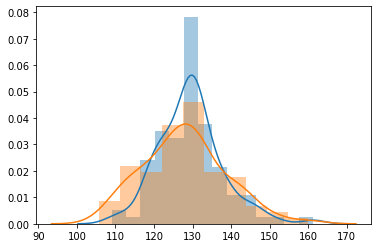

155.2872474747475


In [136]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
from scipy.stats import iqr
#+2*iqr(blood_p_tr
print(np.percentile(blood_p_tr, 75)+2*iqr(blood_p_tr))
pred_train_reg = predict_umbr(blood_p_tr, np.percentile(blood_p_tr, 75), 0)
pred_test_reg = predict_umbr(blood_p_te,np.percentile(blood_p_te, 75), 0)

> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*

In [137]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train_reg))
print("Score test: ",accuracy_score(class_label_test, pred_test_reg)) 

Score train:  0.5300546448087432
Score test:  0.5172413793103449


> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.

In [138]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 


Score train:  0.8415300546448088
Score test:  0.8045977011494253


Se puede observar que el perceptron obtuvo mucho mejor accuracy ya que este ajustara los pesos de cada atributo buscando una mejor predicción, esto puede caer en un overfitting a diferencia de la definicion de un valor P propuesto por los rangos intercuartilicos de la distribución, el cual fue un metodo con menor accuracy pero con menor tendencia a overfitting. (NO SE SI ESTO ES CORRECTO AAAAAAAAAAAAAAAAAAAAAAA)

> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).

Score train Perceptron:  0.7923497267759563
Score test Perceptron:  0.7931034482758621


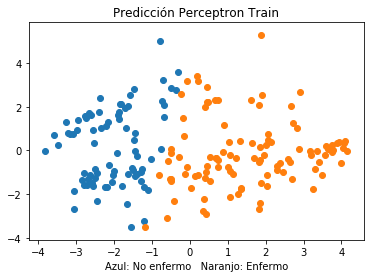

Score train Umbral:  0.7595628415300546
Score test Umbral:  0.8160919540229885


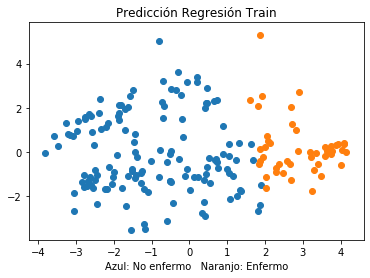

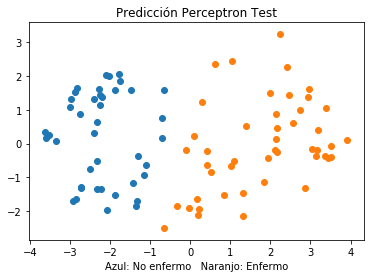

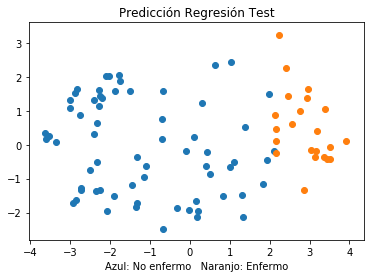

In [150]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)


#Prediccion PCA con Perceptron Train
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(X_pca_train, class_label_train)
pred_train = model.predict(X_pca_train) 
pred_test = model.predict(X_pca_test)
print("Score train Perceptron: ",accuracy_score(class_label_train, pred_train))
print("Score test Perceptron: ",accuracy_score(class_label_test, pred_test)) 
c=0
sanos_train=list()
insanos_train=list()
for i in X_pca_train:
    if pred_train[c]==0:
        sanos_train.append([i[0],i[1]])
    else:
        insanos_train.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_train)[:,0], np.asarray(sanos_train)[:,1])
plt.scatter(np.asarray(insanos_train)[:,0], np.asarray(insanos_train)[:,1])

plt.title('Predicción Perceptron Train')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()

#Predicción PCA con Umbral Train
model = LinearRegression(fit_intercept=True, n_jobs=1)
model.fit(X_pca_train[mask_norm], reg_label_train[mask_norm])
blood_p_tr = model.predict(X_pca_train) 
blood_p_te = model.predict(X_pca_test) 
pred_train_reg = predict_umbr(blood_p_tr, np.percentile(blood_p_tr, 75), 0)
pred_test_reg = predict_umbr(blood_p_te,np.percentile(blood_p_te, 75), 0)
print("Score train Umbral: ",accuracy_score(class_label_train, pred_train_reg))
print("Score test Umbral: ",accuracy_score(class_label_test, pred_test_reg)) 
c=0
sanos_train=list()
insanos_train=list()
for i in X_pca_train:
    if pred_train_reg[c]==0:
        sanos_train.append([i[0],i[1]])
    else:
        insanos_train.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_train)[:,0], np.asarray(sanos_train)[:,1])
plt.scatter(np.asarray(insanos_train)[:,0], np.asarray(insanos_train)[:,1])
plt.title('Predicción Regresión Train')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()


#Predicción PCA con Perceptron Test
c=0
sanos_test=list()
insanos_test=list()
for i in X_pca_test:
    if pred_test[c]==0:
        sanos_test.append([i[0],i[1]])
    else:
        insanos_test.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_test)[:,0], np.asarray(sanos_test)[:,1])
plt.scatter(np.asarray(insanos_test)[:,0], np.asarray(insanos_test)[:,1])
plt.title('Predicción Perceptron Test')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()


#Prediccion PCA con Umbral Test
c=0
sanos_test=list()
insanos_test=list()
for i in X_pca_test:
    if pred_test_reg[c]==0:
        sanos_test.append([i[0],i[1]])
    else:
        insanos_test.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_test)[:,0], np.asarray(sanos_test)[:,1])
plt.scatter(np.asarray(insanos_test)[:,0], np.asarray(insanos_test)[:,1])
plt.title('Predicción Regresión Test')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()

Dado que PCA genera columnas independientes se observa que el Umbral permite obtener una mejor predicción.


> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente

Score train Perceptron:  0.8524590163934426
Score test Perceptron:  0.7701149425287356


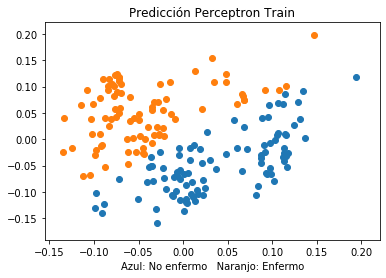

Score train Umbral:  0.7595628415300546
Score test Umbral:  0.8160919540229885


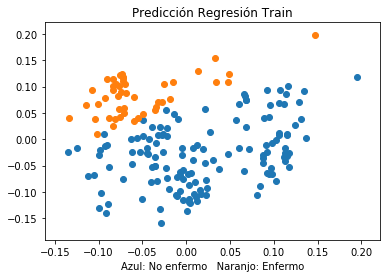

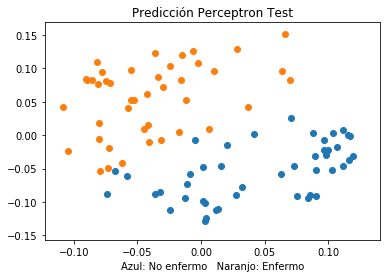

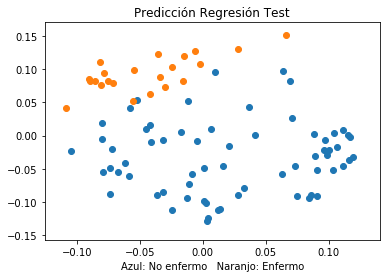

In [151]:
from sklearn.decomposition import FastICA
d = 2
ica_model = FastICA(n_components=d)
ica_model.fit(Xstd_train)
X_ica_train = ica_model.transform(Xstd_train)
X_ica_test = ica_model.transform(Xstd_test)

#Prediccion ICA Perceptron Train
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(X_ica_train, class_label_train)
pred_train = model.predict(X_ica_train) 
pred_test = model.predict(X_ica_test)
print("Score train Perceptron: ",accuracy_score(class_label_train, pred_train))
print("Score test Perceptron: ",accuracy_score(class_label_test, pred_test)) 
c=0
sanos_train=list()
insanos_train=list()
for i in X_ica_train:
    if pred_train[c]==0:
        sanos_train.append([i[0],i[1]])
    else:
        insanos_train.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_train)[:,0], np.asarray(sanos_train)[:,1])
plt.scatter(np.asarray(insanos_train)[:,0], np.asarray(insanos_train)[:,1])
plt.title('Predicción Perceptron Train')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()

#Predicción ICA Umbral Train
model = LinearRegression(fit_intercept=True, n_jobs=1)
model.fit(X_ica_train[mask_norm], reg_label_train[mask_norm])
blood_p_tr = model.predict(X_ica_train) 
blood_p_te = model.predict(X_ica_test) 
pred_train_reg = predict_umbr(blood_p_tr, np.percentile(blood_p_tr, 75), 0)
pred_test_reg = predict_umbr(blood_p_te,np.percentile(blood_p_te, 75), 0)
print("Score train Umbral: ",accuracy_score(class_label_train, pred_train_reg))
print("Score test Umbral: ",accuracy_score(class_label_test, pred_test_reg)) 
c=0
sanos_train=list()
insanos_train=list()
for i in X_ica_train:
    if pred_train_reg[c]==0:
        sanos_train.append([i[0],i[1]])
    else:
        insanos_train.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_train)[:,0], np.asarray(sanos_train)[:,1])
plt.scatter(np.asarray(insanos_train)[:,0], np.asarray(insanos_train)[:,1])
plt.title('Predicción Regresión Train')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()

#Prediccion ICA Perceptron Test
c=0
sanos_test=list()
insanos_test=list()
for i in X_ica_test:
    if pred_test[c]==0:
        sanos_test.append([i[0],i[1]])
    else:
        insanos_test.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_test)[:,0], np.asarray(sanos_test)[:,1])
plt.scatter(np.asarray(insanos_test)[:,0], np.asarray(insanos_test)[:,1])
plt.title('Predicción Perceptron Test')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()


#Prediccion ICA Umbral Test
c=0
sanos_test=list()
insanos_test=list()
for i in X_ica_test:
    if pred_test_reg[c]==0:
        sanos_test.append([i[0],i[1]])
    else:
        insanos_test.append([i[0],i[1]])
    c=c+1
plt.scatter(np.asarray(sanos_test)[:,0], np.asarray(sanos_test)[:,1])
plt.scatter(np.asarray(insanos_test)[:,0], np.asarray(insanos_test)[:,1])
plt.title('Predicción Regresión Test')
plt.xlabel('Azul: No enfermo   Naranjo: Enfermo')
plt.show()

Nuevamente, dado que ICA tambien genera columnas independientes la predicción de umbral obtiene una accuracy muy parecida al perceptron.

> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

**Respuesta:**

<a id="segundo"></a>
## 2. Estimación de edad de personas
El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.

<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) en el **objetivo** de predecir la **edad** (*target value*) de la persona presente en la imagen. Los datos corresponden a 3640 imágenes de rostros de personas extraídos de la plataforma Flickr, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de alto nivel, extraídas manualmente (no-aprendibles). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:
```python
import scipy.io as sio
mat_file = sio.loadmat("event.mat")
```
Mientras que para acceder a la información como tal:
```python
data = mat_file["trcoll"][0][0] # is "tecoll" for testing set
age_true = data[1] #target
...
genFeat = data[0]   # Contextual features
ffcoefs = data[3]   # Fisherface space
faceGist = data[4]  # GIST features
...
```

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

Existen distintas representaciones (descriptores) que usted podrá trabajar y entregársela como *input* a su modelo. Está la libertad de cómo desea trabajar este problema para detectar la edad de la persona, ya sea combinando los descriptores, teniendo un modelo para cada uno, definiendo rangos de edad o cualquier idea que se le ocurra. 

#### Importante
* Recuerde que el conjunto de pruebas está para evaluar su modelo final, **no puede tomar decisiones basadas en este conjunto**. *Sin embargo, Puede generar un conjunto de validación desde el conjunto de entrenamiento o utilizar validación cruzada*.

* La métrica de evaluación será MAPE (*Mean Absolute Percetage Error*).
```python
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```
* Se evaluará la extensión de su experimentación, la correctitud y su creatividad al desarrollar la actividad.

#### --- Bonus ---
Si desea comparar la calidad de solución respecto a otros estudiantes podrá realizar un *submission* de sus resultados en el conjunto de pruebas en la plataforma de __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/3f3c4a759ec3482ab06c06ec91187742)__.

El archivo de *submission* debe contener una columna de *id* asociado a cada conjunto de pruebas, iniciando en 1, se puede generar de la siguiente manera:
```python
ids = np.arange(1, 1+y_pred.shape[0]).reshape(-1,1)
sub_est = np.concatenate([ids, y_pred], axis=-1)
import pandas as pd
df_aux = pd.DataFrame(sub_est, columns=["id","age"])
df_aux.to_csv("test_estimation.csv", index=False)
```

> Para los 3 primeros lugares se otorgará 5, 10 y 15 puntos respectivos en su nota final de esta tarea. 

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Hyvärinen, A., & Oja, E. (2000). *Independent component analysis: algorithms and applications*. Neural networks, 13(4-5), 411-430.